In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import transform
from skimage.exposure import equalize_hist
import os

'd:\\Desktop\\CV Project'

In [3]:
os.chdir('../')

In [15]:
os.listdir('data')

['lionel_messi',
 'maria_sharapova',
 'roger_federer',
 'serena_williams',
 'virat_kohli']

In [12]:

dark_image = imread(os.getcwd()+'\data\lionel_messi\lionel_messi9.png')

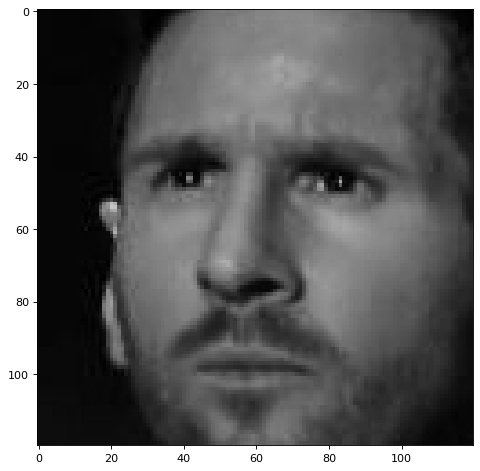

In [13]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dark_image_grey, cmap='gray')

In [14]:
dark_image_grey.shape

(120, 120)

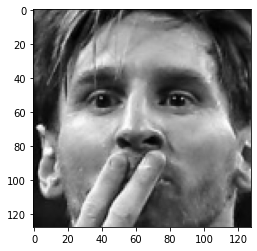

In [7]:
resized_img = transform.resize(dark_image_grey, (128, 128))
plt.imshow(resized_img, cmap='gray')

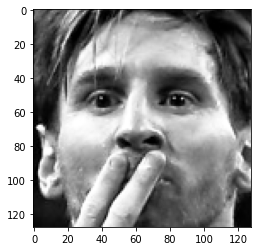

In [12]:
resized_img = equalize_hist(resized_img)
plt.imshow(resized_img, cmap='gray')

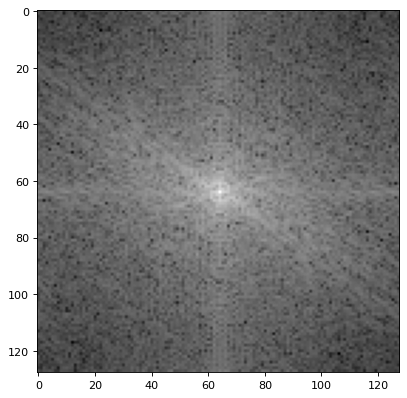

In [9]:
fin_img = np.fft.fftshift(np.fft.fft2(resized_img))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fin_img)), cmap='gray')

In [6]:
import pywt
import cv2
from cv2 import imread
def preprocess(img):
    img = transform.resize(img, (128, 128))
    img = rgb2gray(img)
    img = equalize_hist(img)
    return img
def asImage(arr):
    arr = arr.astype(np.uint8)
    val =  cv2.cvtColor(arr, cv2.COLOR_GRAY2BGR)
    return val

In [10]:


image = imread('D:\Desktop\CV Project\data\lionel_messi\lionel_messi1.png')
image = preprocess(image)
image = pywt.wavedec2(image, 'haar', level=5)
coeffs_H=list(image)  
coeffs_H[0] *= 0;  
# reconstruction
imArray_H=pywt.waverec2(coeffs_H, 'haar');
imArray_H *= 255;
# imArray_H =  np.uint8(imArray_H)
# print(asImage(image).shape)
img =asImage(imArray_H)

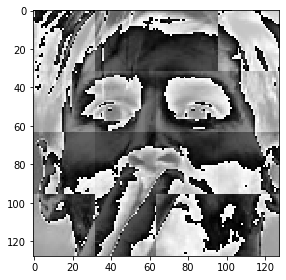

In [11]:
imshow(img)